# Diabetes Prediction using Machine Learning

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Details about the dataset:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Outcome:** Class variable (0 or 1)

**Number of Observation Units:** 768

**Variable Number: 9**

**Result: The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)**

# 1) Exploratory Data Analysis

In [8]:
#Installation of required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#Reading the dataset
df = pd.read_csv("health_care_diabetes.csv")

In [10]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# The last 5 observation units of the data set were accessed.
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [13]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# Descriptive statistics of the data set accessed.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Detecting Null values and Treatmemt

### In this datasets 0 represents the Null values, and hence we will replace 0 by mean of their feature (variable) columns.

In [17]:
# Identifying the mean of the features.
print(df["Glucose"].mean())
print(df["BloodPressure"].mean())
print(df["SkinThickness"].mean())
print(df["Insulin"].mean())
print(df["BMI"].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667
31.992578124999998


In [18]:
# Finding the number of raws which has the null values.
print("Glucose - ",len(df["Glucose"][df["Glucose"]==0]))
print("BloodPressure - ",len(df["BloodPressure"][df["BloodPressure"]==0]))
print("SkinThickness - ",len(df["SkinThickness"][df["SkinThickness"]==0]))
print("Insulin - ",len(df["Insulin"][df["Insulin"]==0]))
print("BMI - ",len(df["BMI"][df["BMI"]==0]))

Glucose -  5
BloodPressure -  35
SkinThickness -  227
Insulin -  374
BMI -  11


In [19]:
# Finding the null values percentage.
selected_column = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
null_percentage = (df[selected_column]==0).mean()*100

#Displaying the null values percentage for each selected column
print("Percentage of Null values for each column: ")
print(null_percentage)

Percentage of Null values for each column: 
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


### Inference from Null values percentage analysis

The analysis of null value percentages in the dataset reveals the following insights:

1. **Glocuse:**

      * Approximately 0.65% of the data points in the "Glucose" column are represented as null values.
      
      
2. **BMI:**
      
      * The "BMI" column has a null value percentage of approximately 1.43%.
      
      
3. **Blood Pressure:**

      * The "Blood Pressure" column has a null value percentage of approximately 4.56%.
      
      
4. **Skin Thickness:**

      * A significant portion of the "Skin Thickness" column, around 29.56%, contains null values.
      
      
5. **Insulin:**

      * The "Insulin" column exhibits a higher null value percentage, with approximately 48.70% of the data points being null.
      
These findings suggest that imputation or other strategies may be necessary for columns with substantial null values, such as "Skin Thickness" and "Insulin" to ensure the integrity of the dataset for subsequent analyses or modeling.

In [21]:
# Replacing the null values with the mean
df["Glucose"]=df["Glucose"].replace([0],[df["Glucose"].mean()])
df["BloodPressure"]=df["BloodPressure"].replace([0],[df["BloodPressure"].mean()])
df["SkinThickness"]=df["SkinThickness"].replace([0],[df["SkinThickness"].mean()])
df["Insulin"]=df["Insulin"].replace([0],[df["Insulin"].mean()])
df["BMI"]=df["BMI"].replace([0],[df["BMI"].mean()])

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# Checking the null values percentage for treated columns.
selected_column = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
null_percentage = (df[selected_column]==0).mean()*100

#Displaying the null values percentage for each selected column
print("Percentage of Null values for each column: ")
print(null_percentage)

Percentage of Null values for each column: 
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


### Inference from Null value treatment

After addressing null values in the dataset, it is observed that all selected columns ("Glocuse", "Blood Pressure", "Skin Thickness", and "Insulin") no longer contain any null values. The null value treatment has been successful, resulting a clean dataset with 0% null values in these specific columns.

# Detecting Outliers and Treatment

In [26]:
columns = df[selected_column]

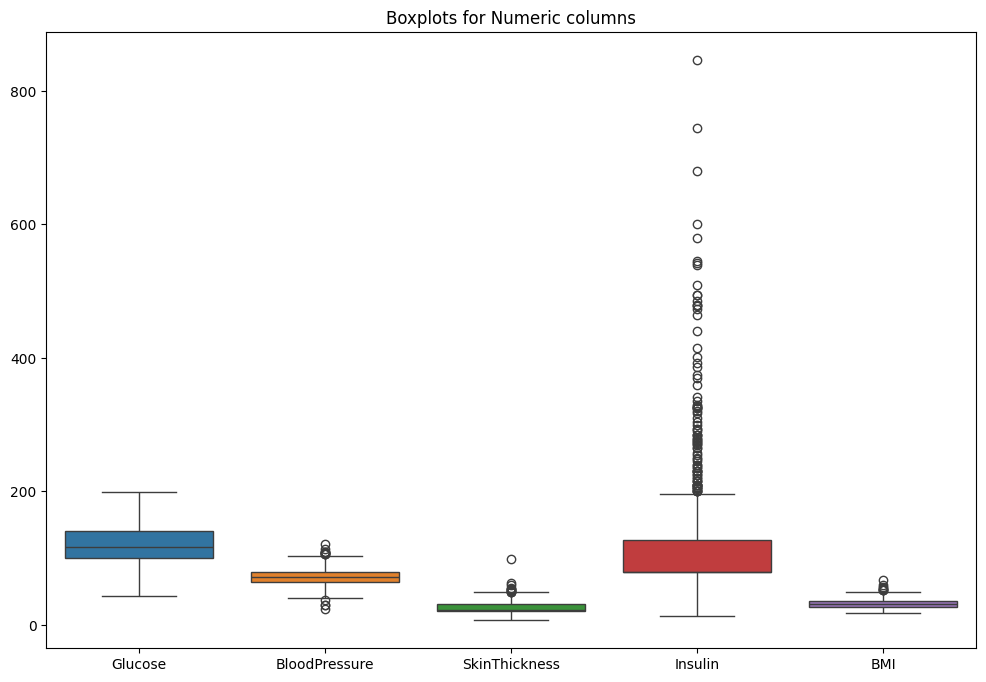

In [27]:
# Display boxplot for numeric columns to visualize outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric columns")
plt.show()

In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
 
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
 
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
 
    # Count the number of outliers
    count_outliers = len(outliers)
 
    return count_outliers
 
# Calculate and print the number of outliers for each column of interest
for column_name in selected_column:
    outlier_count = find_outliers_iqr(df, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89
Number of outliers in the 'BMI' column: 8


# Boxplot Analysis for Numerical Columns

The boxplot illustrates the distribution of four numerical columns: Glucose, BloodPressure, SkinThickness, and Insulin. The following inferences can be drawn:

**Glucose**

   * Median glucose level: ~200 mg/dL
   * IQR is large, indicating considerable variability in glucose levels
   * There are no outliers

**Blood Pressure:**

   * Median blood pressure: 72 mmHg (within the normal range)
   * IQR is relatively small, suggesting more consistent blood pressure levels
   * Few outliers, none extremely high or low
    
**Skin Thickness:**

   * Median skin thickness: ~25 mm
   * IQR is small, indicating less considerable variability in skin thickness
   * Few outliers, none extremely high
    
**Insulin:**

   * Median insulin level: ~79 mlU/L
   * IQR is large, including considerable variability in insulin levels
   * More outliers, many are extremely high
    
**Overall Observations:**

   * All columns exhibit a wide range of values, with some outliers. Insulin column has many outliers
   * Median values for all columns, except the insulin column fall within the normal range
    
**Additional Inferences:**

   * Glucose levels show more variability than blood pressure levels
   * More outliers in the insulin columns compared to blood pressure and skin thickness
    
**Possible Interpretations:**

   * Variability in glucose levels may be influenced by factors like diet, exercise, and stress
   * Outliers in the insulin column may also be associated with underlying medical condition or physiological factors. Evevated insulin levels could be indicative of conditions such as insulin resistance or diabetes. Additionally, factors such as dietary habits, genetic predisposition, or specific medical treatment may contribute to higher insulin levels. Further investigation and domain expertise are necessary to understand the potential health implications of these outliers in the insulin column.
    
It is essential to note that inferences are based on a single boxplot, and further information is needed to draw definitive conclusion.

# Outlier treatment

In [32]:
sorted(df)

Q1=df.quantile(0.20)

Q3=df.quantile(0.80)

IQR=Q3-Q1

print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [33]:
data_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_cleared_iqr.shape)
print(df.shape)

(688, 9)
(768, 9)


In [34]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


# Inference from Outlier Removal using IQR Method

   ### 1 Data Size Reduction:
    
   * After removing outliers using the interquartile range (IQR) method, the dataset has been reduced from 768 to 688 rows
   
   ### 2 Outliers identified:
   
   * Outliers were detected and removed across various columns, particularly impacting features like Glucose, Blood Pressure, Skin Thickness, Insulin, BMI and Age
   
   ### 3 Increased Data Robustness:
   
   * The IQR-Based outlier removal contributes to a more robust dataset, potentially improving the reliability of statistical analyses and modeling.
   
   ### 4 Presereved Features:
   
   * The operation was applied to 9 columns, including predictors like Glucose, Skin Thickness, as well as the target variable outcome.
   
   ### 5 Consideration for domain knowlegde:
   
   * The decision to remove outliers should be made with consideration for domain knowledge, as outliers may contain valuable information or indicate specific health conditions.
   
   ### Final Dataset Statistics:
   
   * Dataset size after outlier removal: 688 rows
   * Original dataset size: 786 rows

In [36]:
col = data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

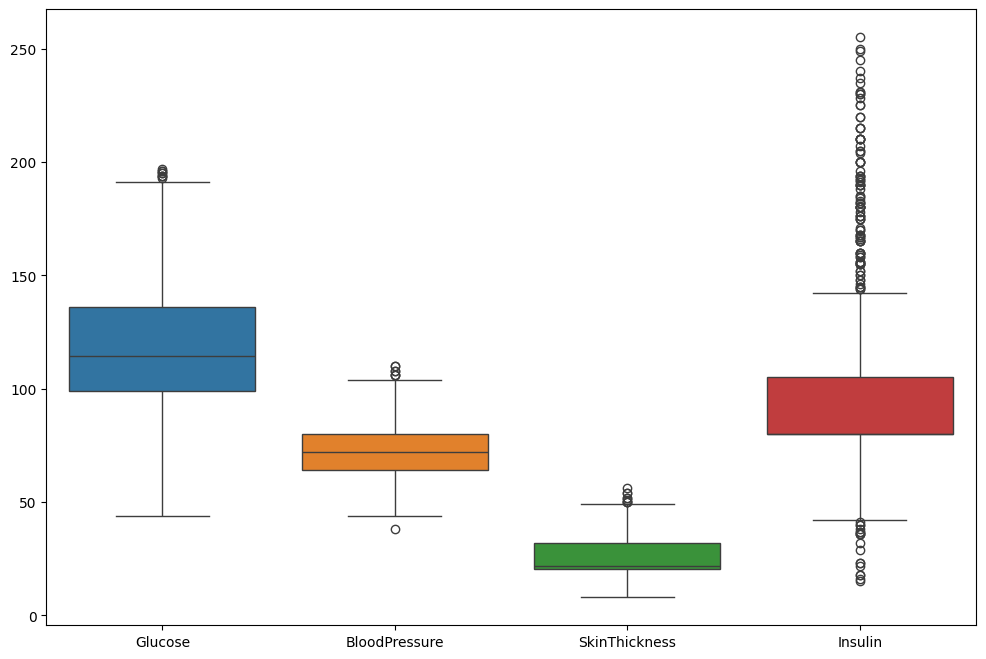

In [37]:
# Checking the outliers after treatment using box plot
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

### It can be observed that the outliers have been significantly reduced

# EDA - Univariable analysis for each feature

## Visually exploring variables using histograms

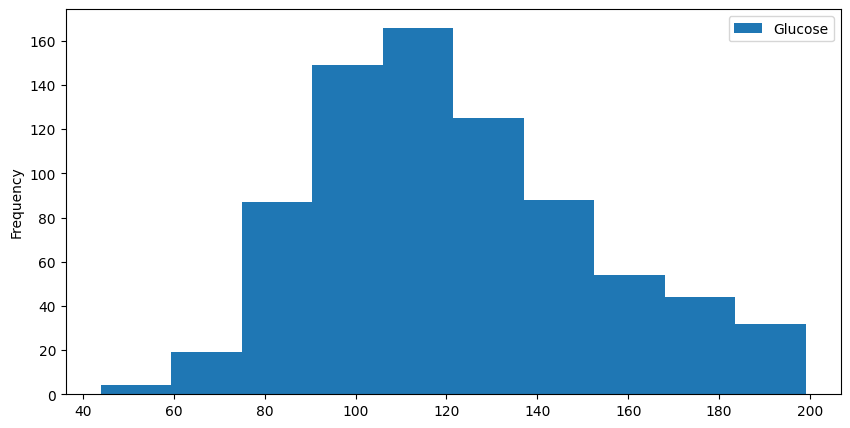

In [41]:
df['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

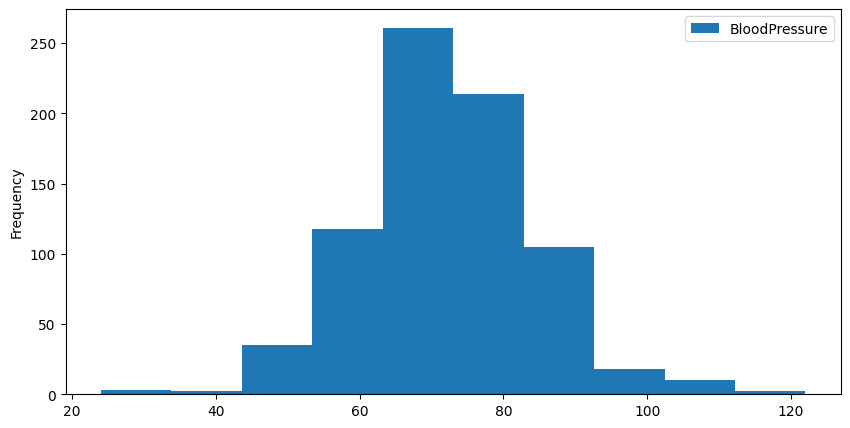

In [42]:
df['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

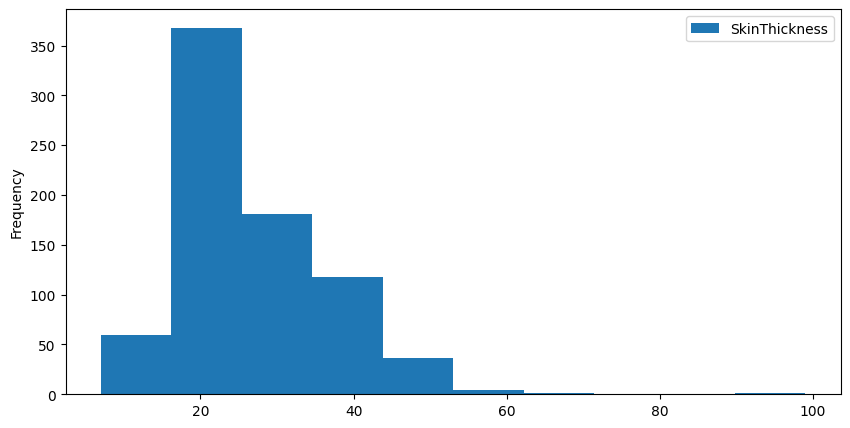

In [43]:
df['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

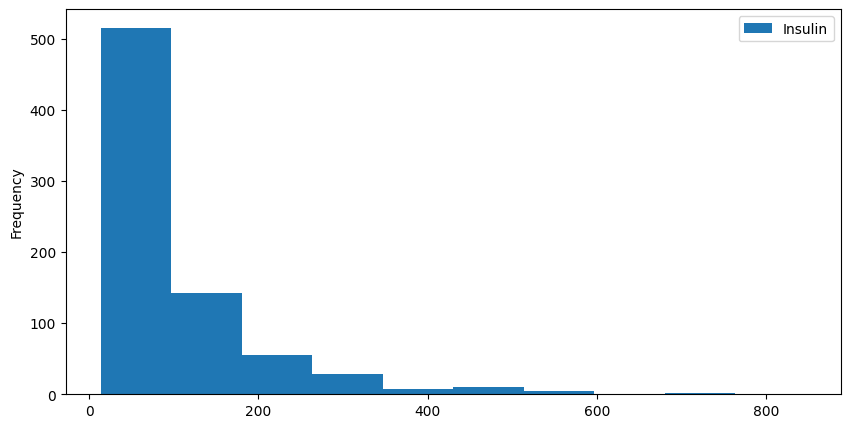

In [44]:
df['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

## Violin plot for the selected features

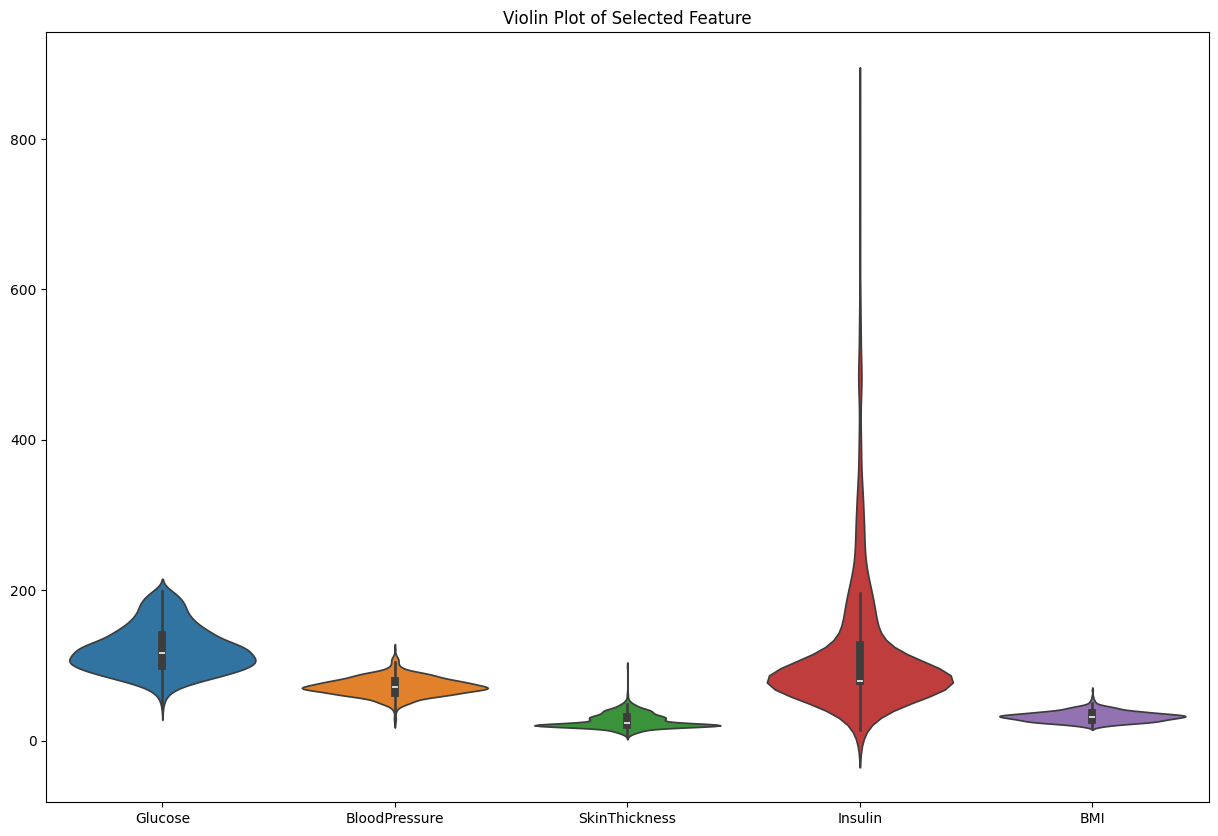

In [46]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df[selected_column])
plt.title("Violin Plot of Selected Feature")
plt.show()

**The violin plot shows the distribution of four numerical features: Glucose, Blood Pressure, Skin Thickness, and Insulin. The violin shape represents the probability density function(PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range(IQR), and outliers.**

## Kernel Density Estimation (KDE) plot for the selected features

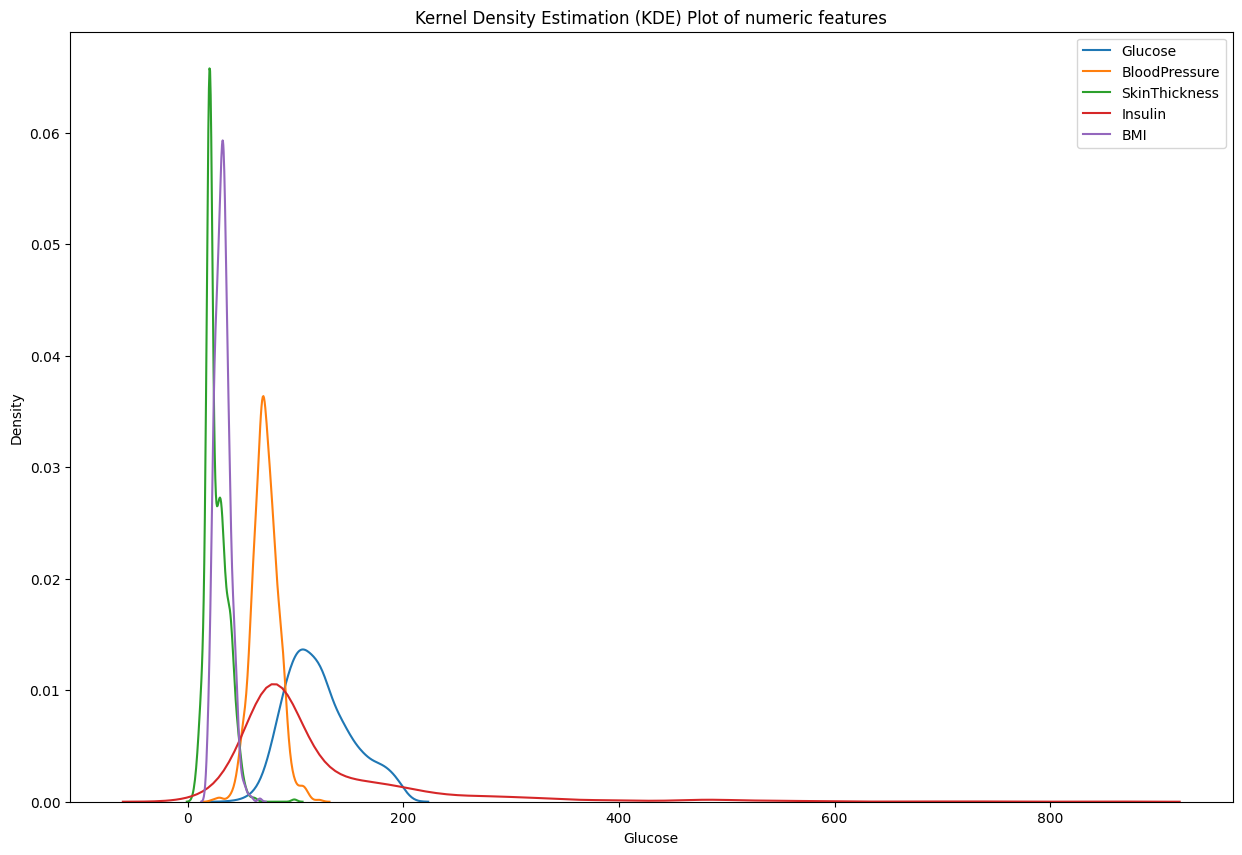

In [49]:
plt.figure(figsize=(15,10))
for column in selected_column:
    sns.kdeplot(df[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of numeric features")
plt.legend()
plt.show()

**The image shows a kernel Density Estimation (KDE) plot of four numerical features: Glucose, Blood Pressure, Skin Thickness, and Insulin. KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be used to visualize the distribution of the data.**

## Creating a count (Frequency) plot describing the data types and the count of variables.

In [52]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [53]:
df.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

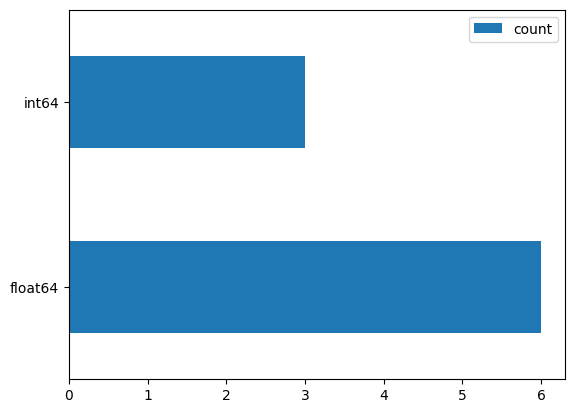

In [54]:
figsize=(16,2)
df.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

**It can be observed that there are three features of interger type and six features of float data type.**

## Data Exploration:

### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [58]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

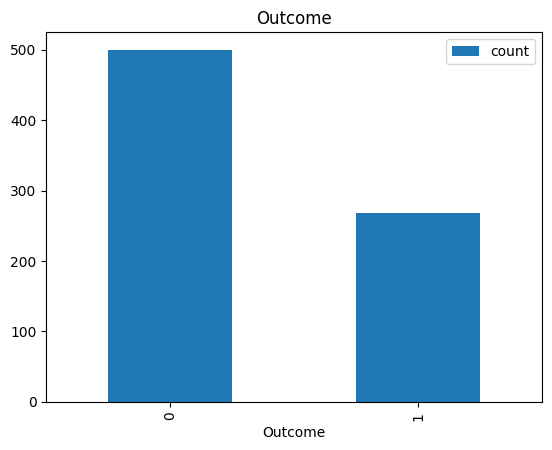

In [59]:
df['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [60]:
outcome=(df['Outcome'].value_counts()/df['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [61]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

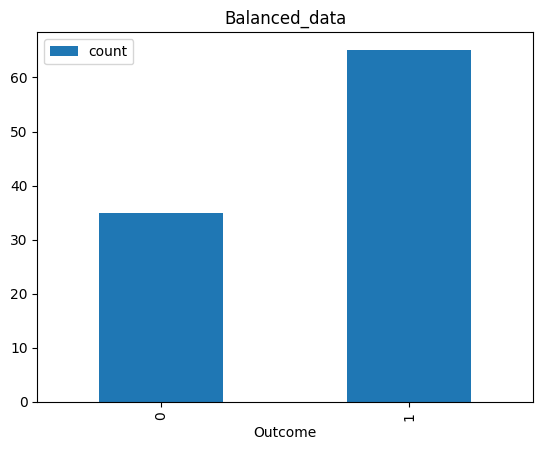

In [62]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

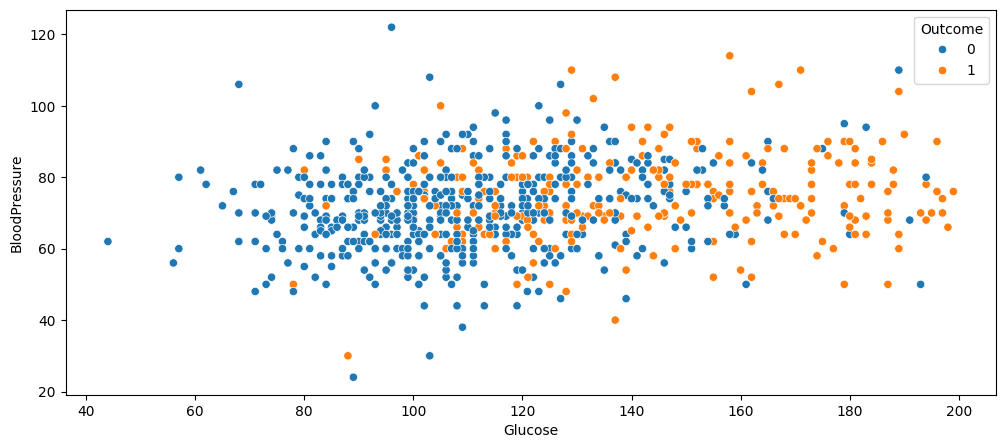

In [63]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df)
plt.show()

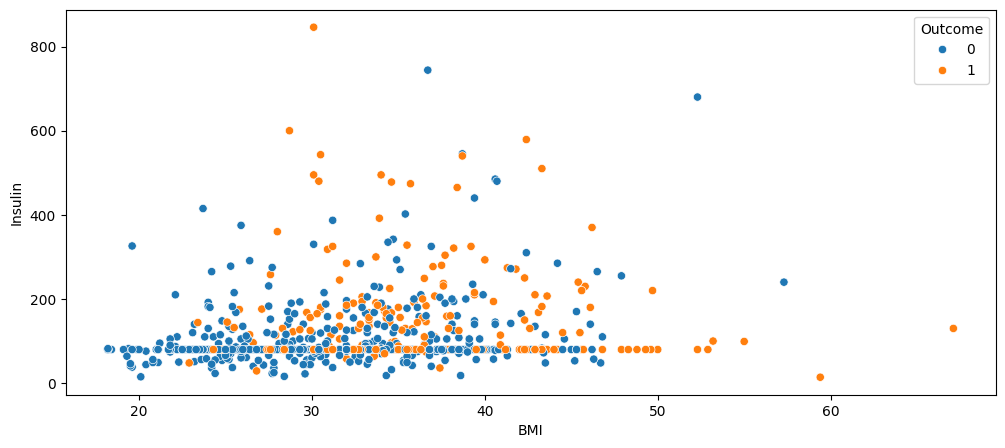

In [64]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=df)
plt.show()

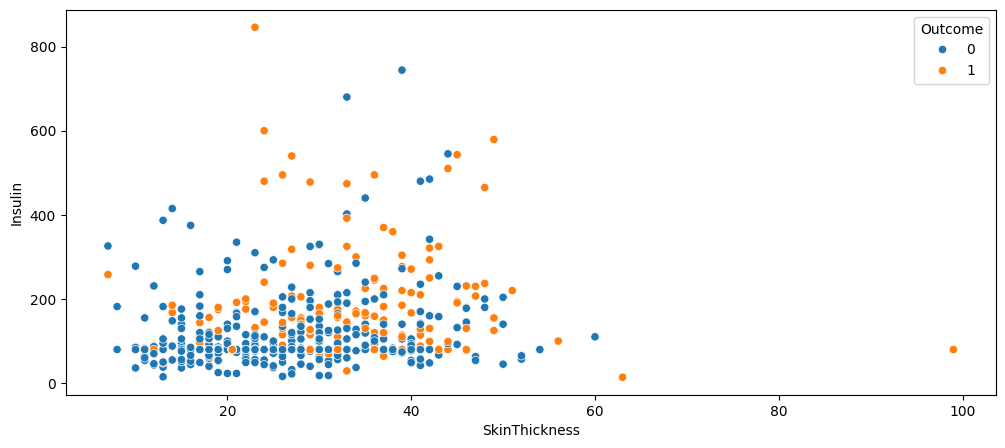

In [65]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df)
plt.show()

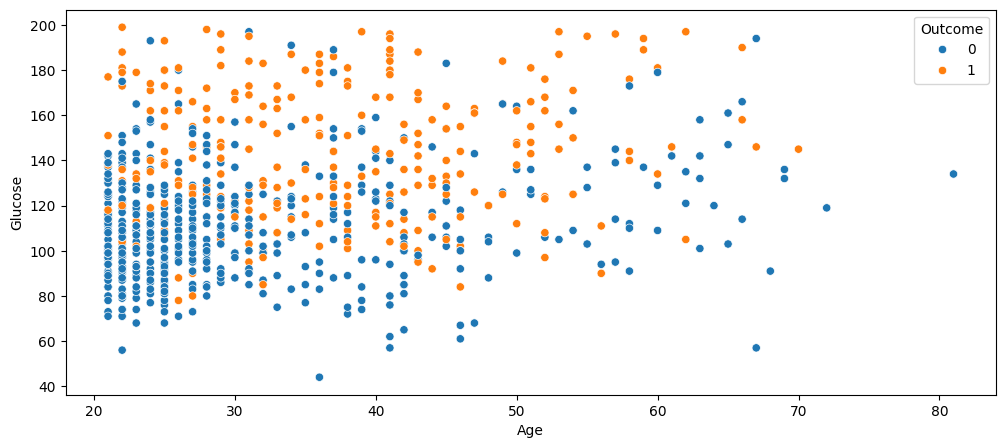

In [66]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=df)
plt.show()

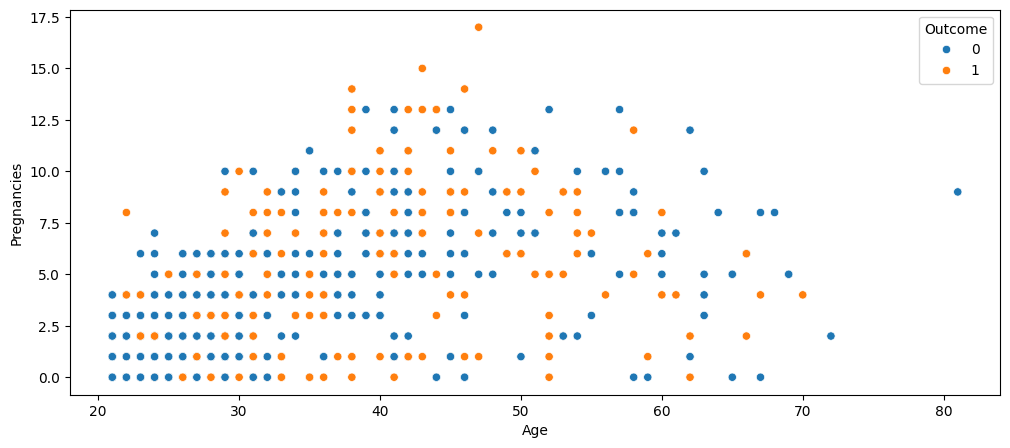

In [67]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=df)
plt.show()

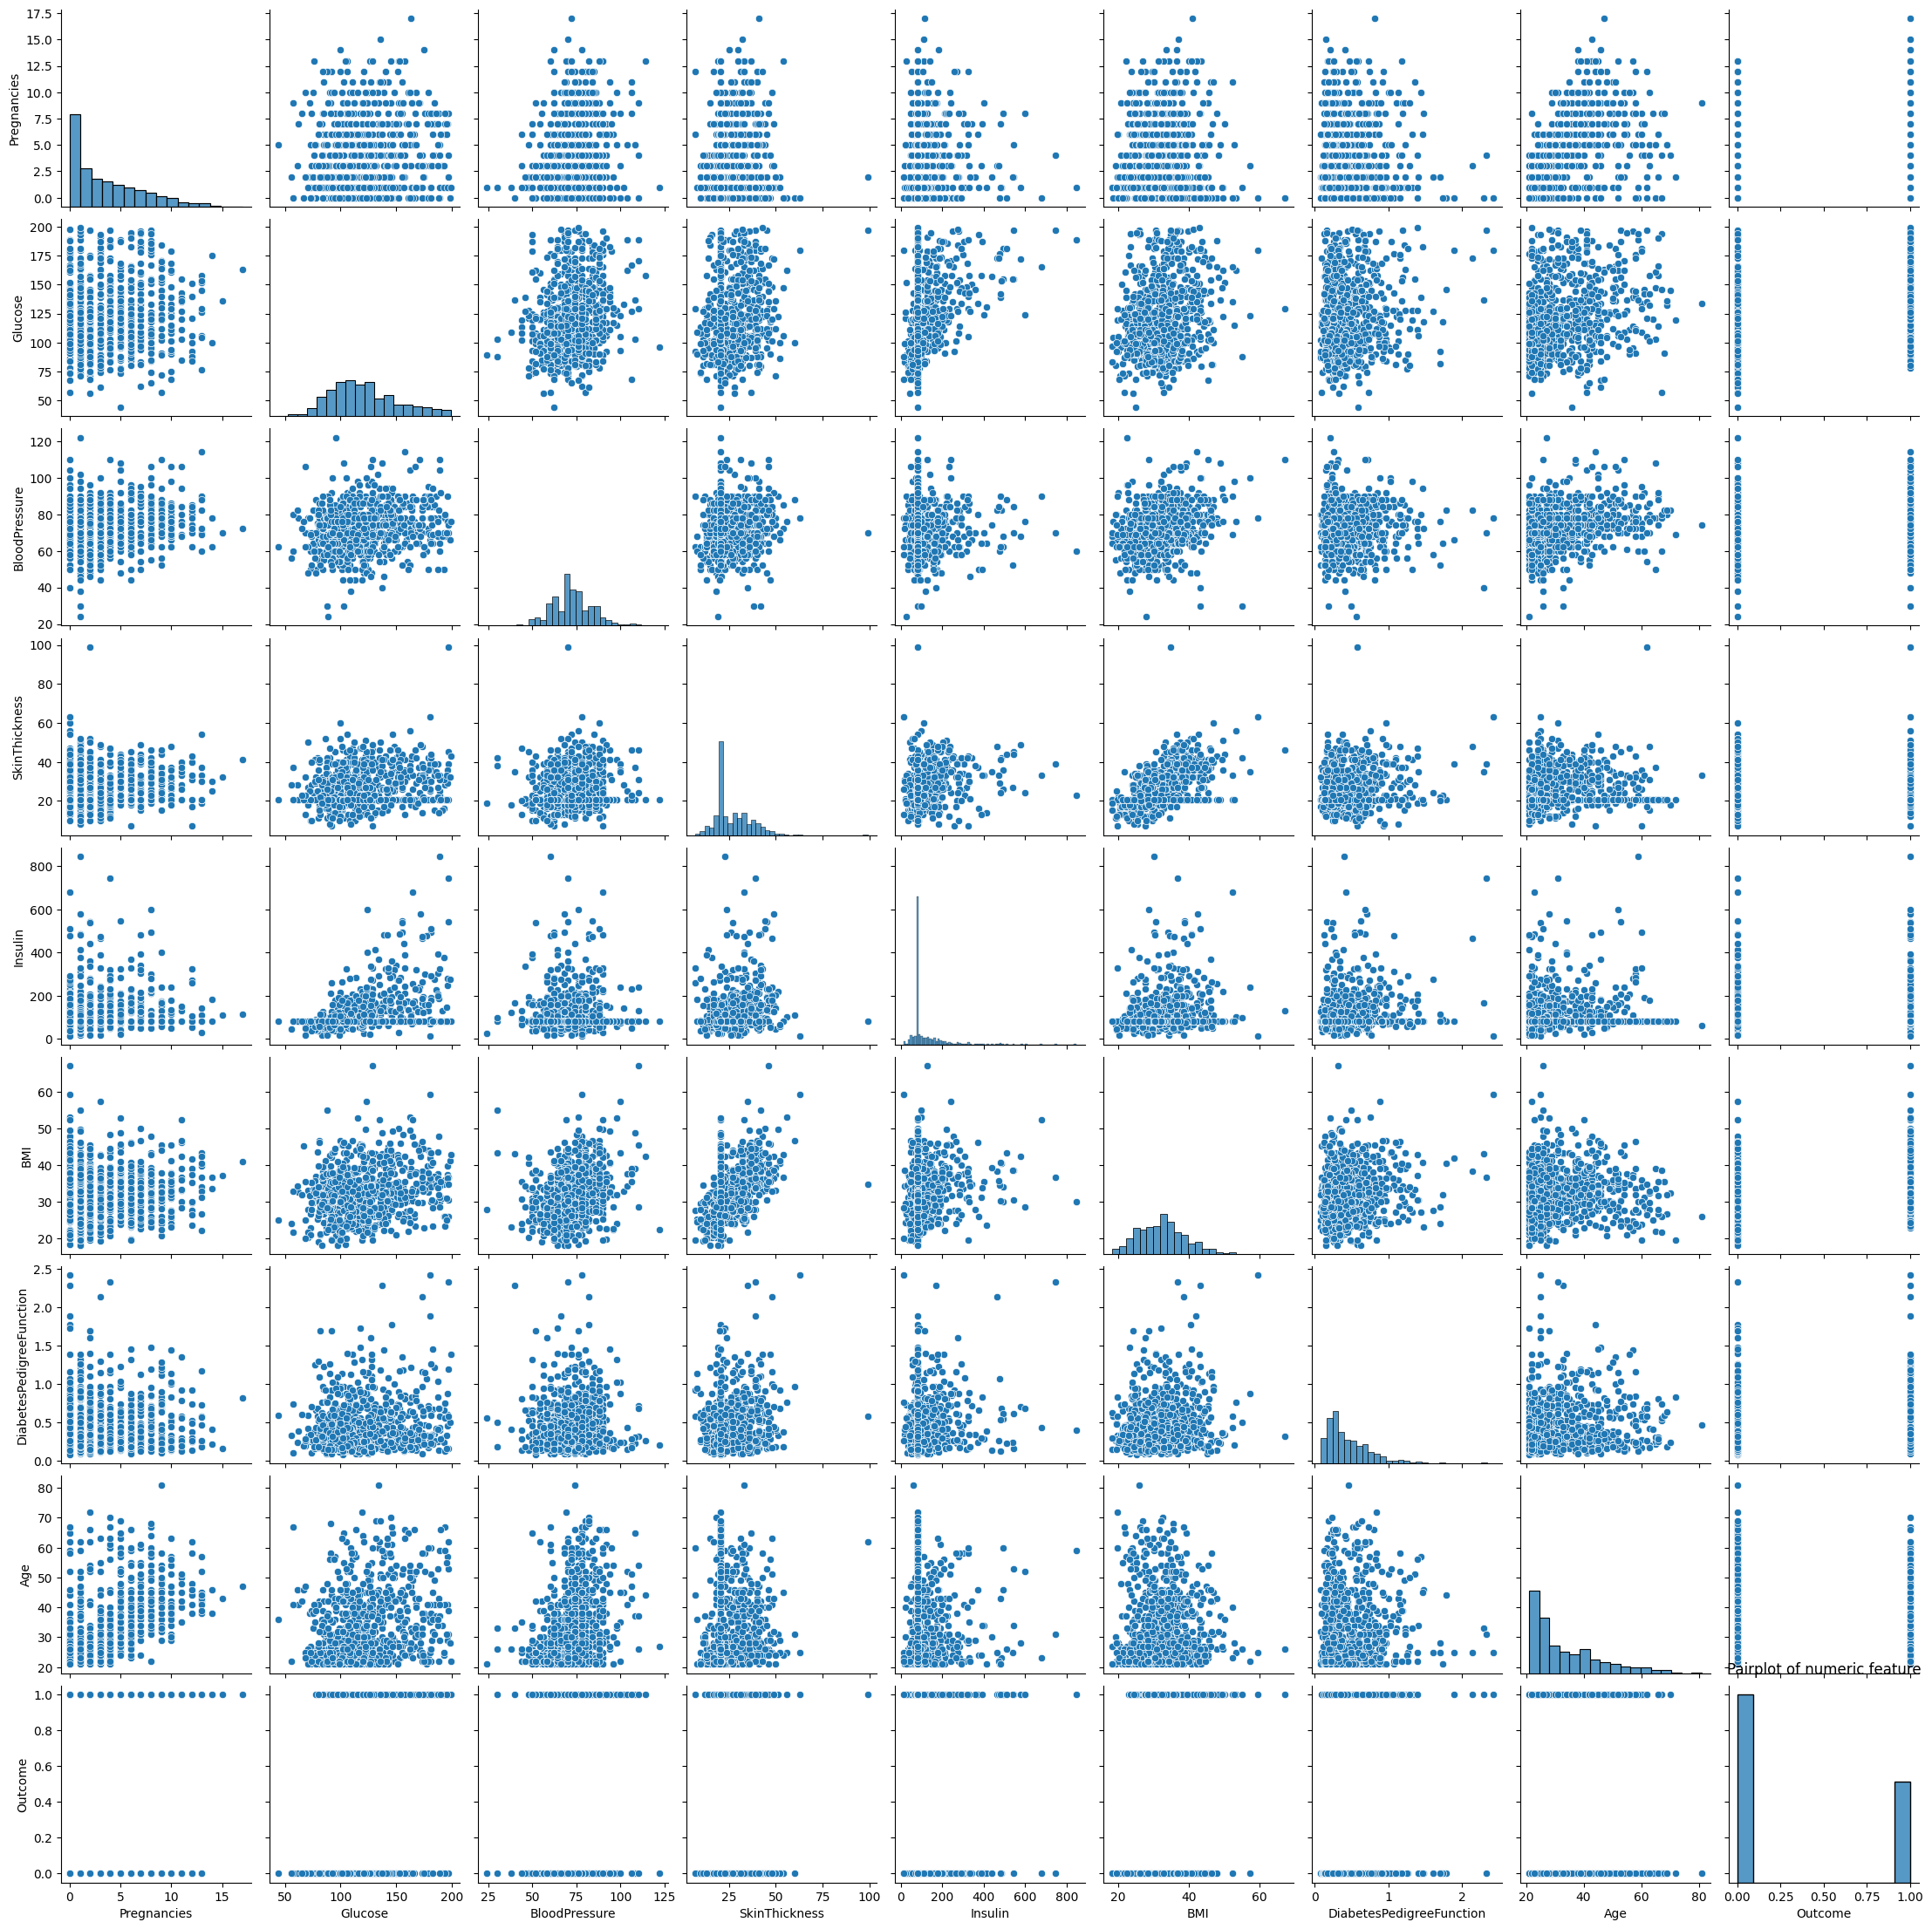

In [68]:
sns.pairplot(data=df)
plt.title('Pairplot of numeric feature', y=1.02)
plt.show()

# Multi-variable Analysis

### Perform correlation analysis, Visually explore it using a heat map.

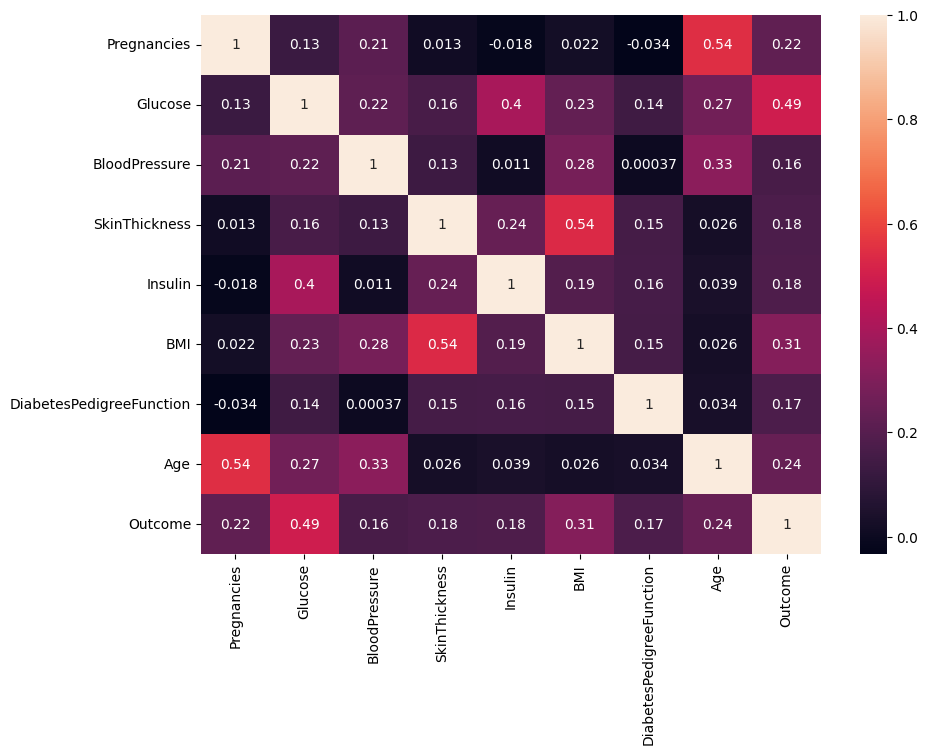

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

**We can see Outcome has maximum relation with Glucose and minimum with Blood Pressure than the other features.**

# Data Modeling

### Feature Selection

In [75]:
# Data Preparation for Modeling
x = df.drop(["Outcome"],axis=1)
y = df.Outcome

In [76]:
# Finding the Correlation of every feature with the Outcome (Target variable)
df.corrwith(df["Outcome"])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [77]:
bestfeatures = SelectKBest(score_func=chi2,k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [78]:
fit.scores_

array([ 111.51969064, 1418.66063574,   41.39466535,   81.91762154,
       1798.08868209,  108.93786733,    5.39268155,  181.30368904])

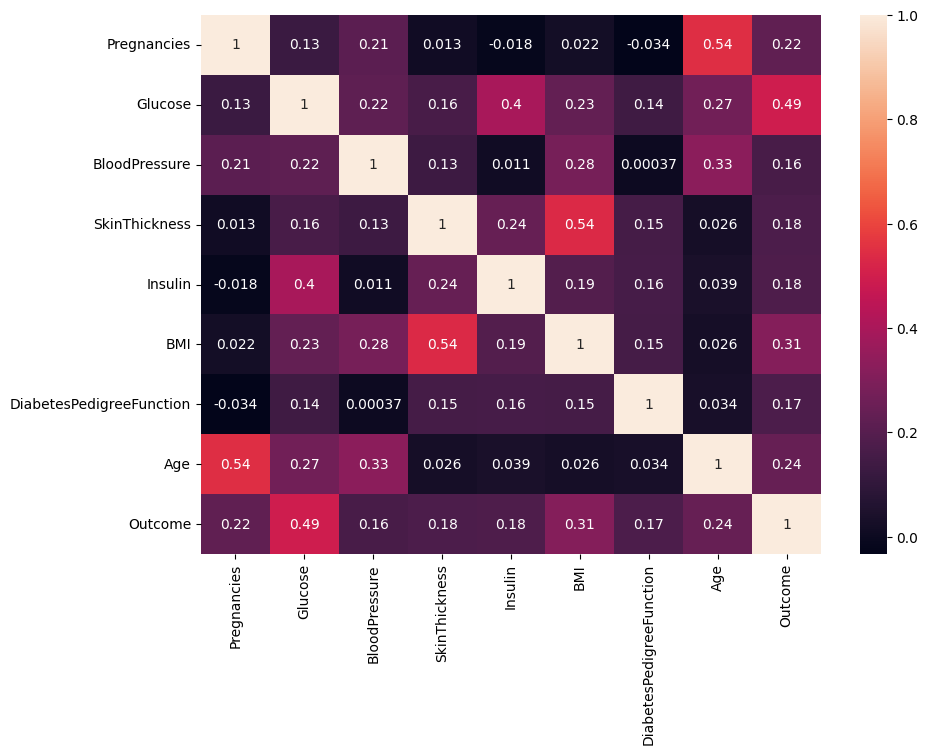

In [79]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [80]:
new_x = df.drop(["Outcome","BloodPressure"],axis=1).values
new_y = df.Outcome.values

# SMOTE to address the class imbalance

### Train a model

In [83]:
# Train Test Split for Data Modeling
trainx,testx,trainy,testy = train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [84]:
print("Before OverSampling, count of label '1':{}".format(sum(trainy==1)))
print("Before OverSampling, count of label '0':{}\n".format(sum(trainy==0)))

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())

print("After OverSampling, the shape of train_x:{}".format(trainx_res.shape))
print("After OverSampling, the shape of train_y:{}\n".format(trainy_res.shape))

print("Before OverSampling, count of label '1':{}".format(sum(trainy_res==1)))
print("After OverSampling, count of label '0':{}".format(sum(trainy_res==0)))

Before OverSampling, count of label '1':209
Before OverSampling, count of label '0':405

After OverSampling, the shape of train_x:(810, 7)
After OverSampling, the shape of train_y:(810,)

Before OverSampling, count of label '1':405
After OverSampling, count of label '0':405


## Applying an appropriate classification algorithm to build a model.

### Model 1 : Building a Logistic Regression Model

In [87]:
logreg = LogisticRegression(solver='liblinear',random_state=123)

In [88]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [89]:
prediction=logreg.predict(testx)

In [90]:
print("Accuracy_score : ",accuracy_score(testy,prediction))
print("Mean_squared_error : ",mean_squared_error(testy,prediction))

Accuracy_score :  0.7207792207792207
Mean_squared_error :  0.2792207792207792


In [91]:
print(confusion_matrix(testy,prediction))

[[69 26]
 [17 42]]


In [92]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.839


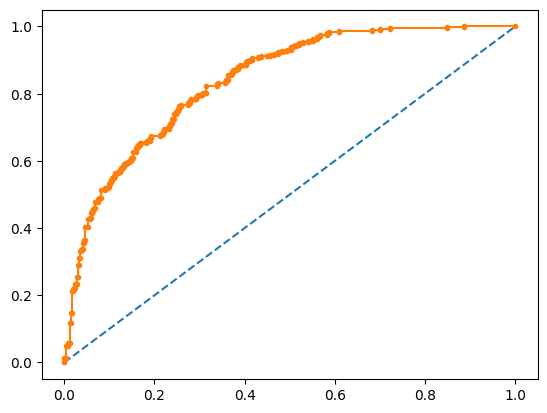

In [93]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve,roc_auc_score

# Predict probabilities
probs = logreg.predict_proba(trainx_res)
# Keep probabilities for the positive outcome only
probs = probs[: ,1]
# Calculate AUC
auc = roc_auc_score(trainy_res , probs)
print("AUC: %.3f" % auc)
# Calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# Plot no skill
plt.plot([0,1],[0,1],linestyle="--")
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker=".")
plt.show()

### Model 2 : RandomForestClassifier

In [95]:
rf = RandomForestClassifier(random_state=42,max_depth=5)

In [96]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [97]:
rf_prediction=rf.predict(testx)

In [98]:
print("Accuracy_score : ",accuracy_score(testy,rf_prediction))
print("Mean_squared_error : ",mean_squared_error(testy,rf_prediction))

Accuracy_score :  0.7597402597402597
Mean_squared_error :  0.24025974025974026


### RandomForestClassifier( Hyper Parameter Tunning)

In [100]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3],'max_samples':[2,3,4]}

In [101]:
grid=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [102]:
rf_grid=RandomForestClassifier(criterion='gini',max_depth=2,max_leaf_nodes=3,max_samples=4,min_samples_leaf=1,min_samples_split=3,n_estimators=400,random_state=42)

In [103]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [104]:
rf_grid_prediction=rf_grid.predict(testx)

In [105]:
print("Accuracy_score : ",accuracy_score(testy,rf_grid_prediction))
print("Mean_squared_error : ",mean_squared_error(testy,rf_grid_prediction))

Accuracy_score :  0.7337662337662337
Mean_squared_error :  0.2662337662337662


In [106]:
print(confusion_matrix(testy,rf_grid_prediction))

[[65 30]
 [11 48]]


In [107]:
print(classification_report(testy,rf_grid_prediction))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        95
           1       0.62      0.81      0.70        59

    accuracy                           0.73       154
   macro avg       0.74      0.75      0.73       154
weighted avg       0.76      0.73      0.74       154



AUC: 0.939


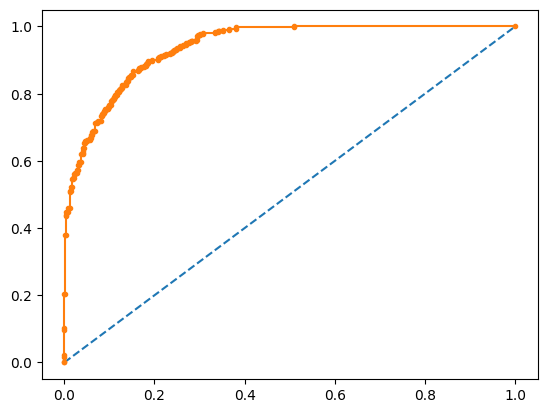

In [108]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve,roc_auc_score

# Predict probabilities
probs = rf.predict_proba(trainx_res)
# Keep probabilities for the positive outcome only
probs = probs[: ,1]
# Calculate AUC
auc = roc_auc_score(trainy_res , probs)
print("AUC: %.3f" % auc)
# Calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# Plot no skill
plt.plot([0,1],[0,1],linestyle="--")
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker=".")
plt.show()

### Model 3 : Decision Tree Classifier

In [110]:
dc=DecisionTreeClassifier(random_state=42)

In [111]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [112]:
dc_prediction=dc.predict(testx)

In [113]:
print("Accuracy_score : ",accuracy_score(testy,dc_prediction))
print("Mean_squared_error : ",mean_squared_error(testy,dc_prediction))

Accuracy_score :  0.6233766233766234
Mean_squared_error :  0.37662337662337664


In [114]:
dc_param_grid={'splitter':['best','random'],'criterion':['gini','entropy'],
            'max_depth':[1,2,3],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [115]:
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             verbose=2)

In [116]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [117]:
dc_final=DecisionTreeClassifier(criterion='gini',max_depth=2,max_leaf_nodes=4,
                               min_samples_leaf=1,min_samples_split=2,splitter='best',random_state=42)

In [118]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [119]:
print("Accuracy_score : ",accuracy_score(testy,dc_final_pred))
print("Mean_squared_error : ",mean_squared_error(testy,dc_final_pred))

Accuracy_score :  0.6883116883116883
Mean_squared_error :  0.3116883116883117


In [120]:
print(confusion_matrix(testy,dc_final_pred))

[[73 22]
 [26 33]]


In [121]:
print(classification_report(testy,dc_final_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC: 0.792


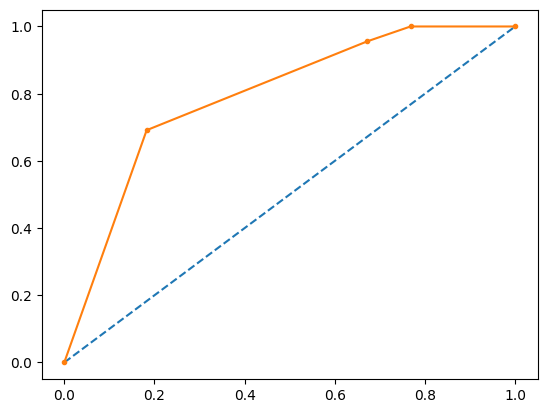

In [122]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve,roc_auc_score

# Predict probabilities
probs = dc_final.predict_proba(trainx_res)
# Keep probabilities for the positive outcome only
probs = probs[: ,1]
# Calculate AUC
auc = roc_auc_score(trainy_res , probs)
print("AUC: %.3f" % auc)
# Calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# Plot no skill
plt.plot([0,1],[0,1],linestyle="--")
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker=".")
plt.show()

### Model 4 : KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn=KNeighborsClassifier(n_neighbors=4)

In [126]:
knn.fit(trainx_res,trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [127]:
knn_pred=knn.predict(testx)

In [128]:
print("Accuracy_score : ",accuracy_score(testy,knn_pred))
print("Mean_squared_error : ",mean_squared_error(testy,knn_pred))

Accuracy_score :  0.6233766233766234
Mean_squared_error :  0.37662337662337664


In [129]:
print(confusion_matrix(testy,knn_pred))

[[68 27]
 [31 28]]


In [130]:
print(classification_report(testy,knn_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC: 0.951


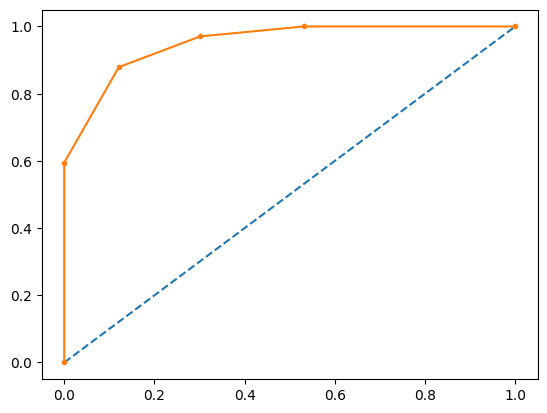

In [131]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve,roc_auc_score

# Predict probabilities
probs = knn.predict_proba(trainx_res)
# Keep probabilities for the positive outcome only
probs = probs[: ,1]
# Calculate AUC
auc = roc_auc_score(trainy_res , probs)
print("AUC: %.3f" % auc)
# Calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# Plot no skill
plt.plot([0,1],[0,1],linestyle="--")
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker=".")
plt.show()

## Model Accuracy Comparison

In [133]:
Algorithm=["KNN","RandomForest","DecisionTree"]
Accuracy_score=[accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_prediction),accuracy_score(testy,dc_final_pred)]

accuracy_df = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy_score})
print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.623377
1  RandomForest  0.733766
2  DecisionTree  0.688312


### 